<b><em>Authors:</em></b><br>
Eduardo Paz<br>
Asmaa Abdul-Amin<br>
Parker Link<br>
Ahmed Sachit <br>
Alhassane Moulaye<br>


<h1 style="text-align: center;font-size: 31pt;">CMSC206: Data Analysis Project</h1>

In this section, I will import the necessary libraries to download and analyze stock price data for aerospace and defense stocks. I have prefiltered the dataset to focus on financially strong stocks with positive momentum and liquidity. This was done by selecting stocks trading above their 20-day Simple Moving Average (SMA). The Aerospace and Defense Industry capitalizes on government contracts and defense spending.

In our analysis we can check for rising volume which indicates growing investor interest. To further develop this project we can also integrate Feature Engineering, Statistical analysis, and  machine learning models to predict future stock prices.


If you guys are interested, I have a working model that utilizes quantum computing techniques to generate an optimal portfolio of five stocks based on a similar data extraction. Then it comapres the quantum generated model to a classicaly generated model... let me know what you guys think or like what direction you all would like to see this project go in. Im open to any suggestions or ideas you may have.


Below is the full list of aerospace and defense stocks used in this analysis:<br>
Dataset 1:  https://drive.google.com/file/d/1_09iFs0UXSXsCOPHFC1H67xQpjdpc1TL/view?usp=sharing<br>
Dataset 2:  https://drive.google.com/file/d/1AmsQ95PffFlcoCkINd8iCxmLYdT1yIQJ/view?usp=sharing

In [36]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import re
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use("dark_background")

In [37]:
# Define the expected file path
#file_name = "https://drive.google.com/uc?export=download&id=1Kyky0DRWqLz3JCrPip2r9rzwBYMCozrK"
file_name = "https://drive.google.com/uc?export=download&id=1AmsQ95PffFlcoCkINd8iCxmLYdT1yIQJ"
# Load stock symbols from Google Sheets
df = pd.read_csv(file_name)

# Ensure 'Symbol' column exists
if 'Symbol' not in df.columns:
    raise ValueError("CSV file must contain a 'Symbol' column.")

# Extract symbols
symbols = df["Symbol"].dropna().tolist()
symbols

['ATROB',
 'DUAVF',
 'QNTQY',
 'NSKFF',
 'SAABF',
 'QNTQF',
 'HNSDF',
 'FINMF',
 'CMGMY',
 'CZGZF',
 'FINMY',
 'KWHIY',
 'SAABY',
 'MHVYF',
 'BAESF',
 'HAGHY',
 'CMGMF',
 'MHVIY',
 'ATRO',
 'ESLT',
 'THLLY',
 'THLEF',
 'RYCEY',
 'KBGGY',
 'GGRGF',
 'RNMBY',
 'BAESY',
 'OPST',
 'YRLLF',
 'DRSHF',
 'EADSY',
 'MTUAY',
 'MNDP',
 'BYPLF',
 'GE',
 'ERJ',
 'KTOS',
 'HWM',
 'CDRE',
 'AIR',
 'HEI.A',
 'GD',
 'RNMBF',
 'NOC',
 'RTX',
 'HII',
 'SAFRY',
 'MAXQF',
 'HEI',
 'RYCEF',
 'EADSF',
 'MTUAF',
 'SATL',
 'RLLCF',
 'HWM/P',
 'SAFRF',
 'TGI',
 'POWWP',
 'LDDFF',
 'SGGKY',
 'AETHF',
 'SGGKF']

In [38]:
tickers = symbols
# Filter tickers that do NOT have special characters
filtered_tickers = [ticker for ticker in symbols if re.match(r'^[A-Z0-9]+$', ticker)]
tickers = filtered_tickers

In [39]:
ohlc = yf.download(tickers, period="max").loc["1990":]

[*********************100%***********************]  60 of 60 completed


In [40]:
prices = ohlc["Close"].dropna(how="all")
prices.tail() # prints the last 5 rows

Ticker,AETHF,AIR,ATRO,ATROB,BAESF,BAESY,BYPLF,CDRE,CMGMF,CMGMY,...,SAABY,SAFRF,SAFRY,SATL,SGGKF,SGGKY,TGI,THLEF,THLLY,YRLLF
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-06,0.0125,64.089996,24.500000,24.0,21.190001,85.260002,8.4,32.919998,5.43,5.97,...,18.750000,278.500000,69.260002,2.950,3.860,41.0,25.250000,275.500000,54.209999,0.4
2025-03-07,0.0125,64.519997,24.450001,24.9,20.250000,83.099998,8.4,34.020000,5.43,5.14,...,18.020000,278.940002,68.660004,2.925,5.100,41.0,25.340000,265.000000,51.439999,0.4
2025-03-10,0.0150,64.120003,24.030001,24.9,20.250000,82.760002,8.4,33.849998,5.43,5.16,...,18.209999,255.100006,65.250000,2.790,5.100,45.5,25.250000,263.170013,51.139999,0.4
2025-03-11,0.0220,65.379997,24.590000,24.9,20.059999,81.849998,8.4,33.520000,5.43,5.64,...,19.280001,264.679993,65.989998,2.950,4.898,45.5,25.250000,255.100006,51.653999,0.4
2025-03-12,NaN,66.290001,24.750000,NaN,20.650000,83.260002,NaN,34.669998,NaN,5.41,...,19.250000,270.000000,68.449997,3.660,NaN,NaN,25.290001,262.000000,52.090000,NaN


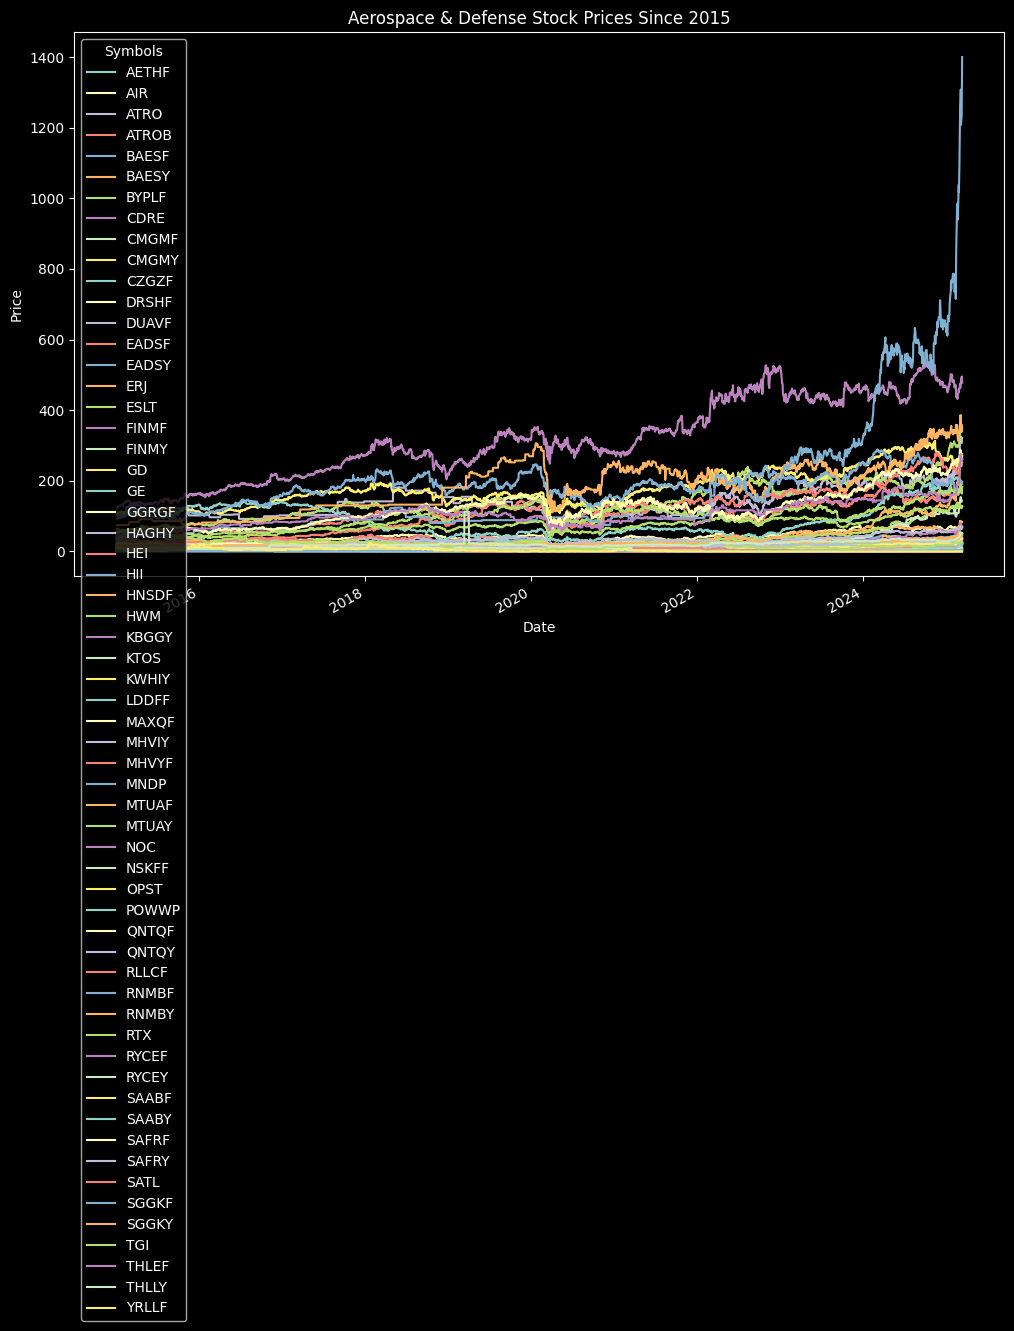

In [41]:
# Plot the stock close prices since 2015
prices[prices.index >= "2015-01-01"].plot(figsize=(12,8))

plt.title("Aerospace & Defense Stock Prices Since 2015")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(title="Symbols")

Stocks with expected returns > 0.1:
Ticker
ATRO    0.186191
ESLT    0.140551
GD      0.151055
HEI     0.216312
NOC     0.151691
RTX     0.125865
dtype: float64


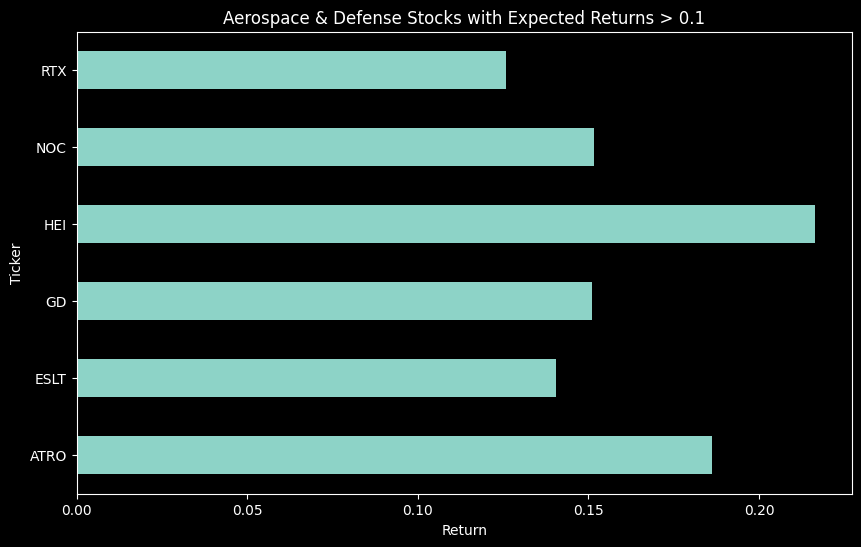

In [42]:
from pypfopt import expected_returns

# Drop tickers with too many NaNs (adjust threshold if needed)
prices_cleaned = prices.dropna(axis=1, thresh=int(0.8 * len(prices)))

# Forward-fill missing values (for small gaps)
prices_cleaned = prices_cleaned.ffill().bfill()

# Re-run expected returns calculation
mu = expected_returns.capm_return(prices_cleaned)

# Calculate expected returns (mean historical, but CAPM works similarly)
mu_mean = expected_returns.mean_historical_return(prices_cleaned)

# Filter stocks with expected return > 0.1
positive_returns = mu_mean[mu_mean > 0.1]

# Display filtered tickers
print("Stocks with expected returns > 0.1:")
print(positive_returns)

# Optional: Plot them
import matplotlib.pyplot as plt

positive_returns.plot.barh(figsize=(10, 6))
plt.title("Aerospace & Defense Stocks with Expected Returns > 0.1")
plt.xlabel("Return")
plt.ylabel("Ticker")
plt.show()


Stocks with expected returns > 0.05:
Ticker
ATRO     0.186191
ATROB    0.069749
BAESY    0.081734
EADSF    0.073595
EADSY    0.056230
ESLT     0.140551
GD       0.151055
GE       0.084469
HEI      0.216312
HII      0.053737
HWM      0.057115
MTUAY    0.061907
NOC      0.151691
NSKFF    0.158229
RLLCF    0.108965
RNMBF    0.102718
RNMBY    0.111216
RTX      0.125865
SAABF    0.115516
SAFRF    0.072707
SAFRY    0.082113
THLEF    0.059137
THLLY    0.061808
dtype: float64


Text(0, 0.5, 'Ticker')

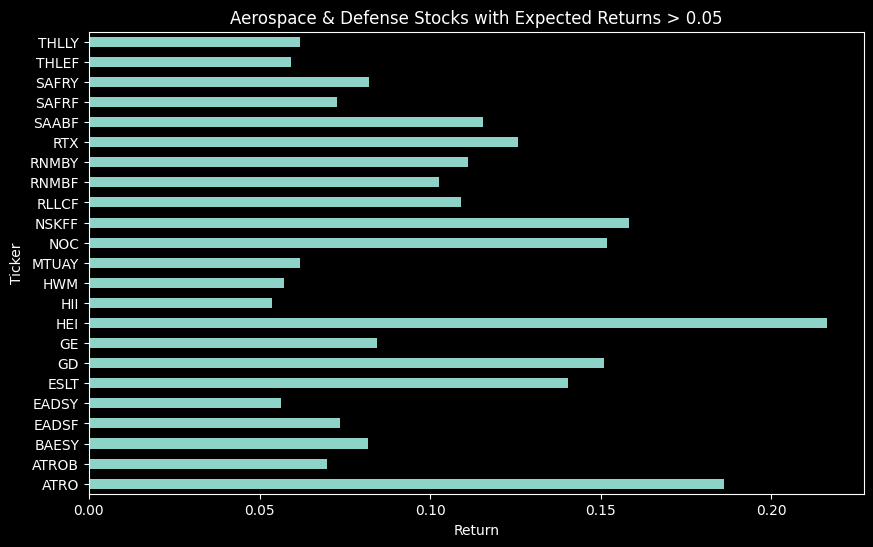

In [ ]:
# Additional Analysis...

prices = prices.ffill().bfill()
mu_mean_dirty = expected_returns.mean_historical_return(prices) # Dirty because I just ffilled and bfilled NaNs instead of removing them

# Filter stocks with expected return > 0.05
positive_returns_dirty = mu_mean_dirty[mu_mean_dirty > 0.05]

# Display filtered tickers
print("Stocks with expected returns > 0.05:")
print(positive_returns_dirty)

# Optional: Plot them
import matplotlib.pyplot as plt

positive_returns_dirty.plot.barh(figsize=(10, 6))
plt.title("Aerospace & Defense Stocks with Expected Returns > 0.05")
plt.xlabel("Return")
plt.ylabel("Ticker")